Load data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import joblib

x_train_bal = pd.read_csv('/content/drive/MyDrive/balanced_split/X_train_bal.csv')
x_test_bal = pd.read_csv('/content/drive/MyDrive/balanced_split/X_test_bal.csv')
balanced_df = pd.read_csv('/content/drive/MyDrive/balanced_df.csv')
y_train_bal = pd.read_csv('/content/drive/MyDrive/balanced_split/y_train_bal.csv').squeeze()
y_test_bal = pd.read_csv('/content/drive/MyDrive/balanced_split/y_test_bal.csv').squeeze()
X_train_bal_vec = joblib.load('/content/drive/MyDrive/balanced_split/X_train_bal_vec.pkl')
X_test_bal_vec = joblib.load('/content/drive/MyDrive/balanced_split/X_test_bal_vec.pkl')

In [ ]:
balanced_df.head()

,Reviews,Rating
0,really gotten bad worth money order two item n...,1
1,sorry write address cannot accept incoming e m...,1
2,dog decidedly new age impressed fact dog treat...,1
3,purchase lego ferrari arrive external box dent...,1
4,could give amazon zero would po box fill amazo...,1


In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
import joblib

Logistic regression

In [ ]:
import warnings
warnings.filterwarnings("ignore")

print("Logistic Regression")

# Initialize Logistic Regression
lr = LogisticRegression(max_iter=2000, solver='liblinear')

# Define parameter grid for tuning
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],   # Regularization strength
    'penalty': ['l1', 'l2'],         # Regularization type
    'class_weight': [None, 'balanced']  # Handle class imbalance
}

# GridSearchCV setup
grid_lr = GridSearchCV(
    estimator=lr,
    param_grid=param_grid_lr,
    cv=5,                   # 5-fold cross-validation
    scoring='accuracy',
    n_jobs=-1,              # Use all CPU cores
    verbose=1
)

# Fit model on training data
grid_lr.fit(X_train_bal_vec, y_train_bal)

# Predictions on test set
y_pred_lr = grid_lr.predict(X_test_bal_vec)

# Print results
print("\n Best Parameters:", grid_lr.best_params_)
print(" Best CV Score:", grid_lr.best_score_)
print(" Test Accuracy:", accuracy_score(y_test_bal, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test_bal, y_pred_lr))

Logistic Regression
Fitting 5 folds for each of 20 candidates, totalling 100 fits

 Best Parameters: {'C': 1, 'class_weight': None, 'penalty': 'l2'}
 Best CV Score: 0.467375
 Test Accuracy: 0.4805

Classification Report:
               precision    recall  f1-score   support

           1       0.62      0.71      0.66       400
           2       0.41      0.35      0.38       400
           3       0.40      0.35      0.37       400
           4       0.39      0.34      0.36       400
           5       0.53      0.65      0.58       400

    accuracy                           0.48      2000
   macro avg       0.47      0.48      0.47      2000
weighted avg       0.47      0.48      0.47      2000



In [ ]:
y_pred = grid_lr.predict(X_test_bal_vec)
print("\nConfusion Matrix:\n", confusion_matrix(y_test_bal, y_pred))


Confusion Matrix:
 [[284  71  18  12  15]
 [ 87 140 103  32  38]
 [ 55  72 141  90  42]
 [ 22  39  63 136 140]
 [ 12  17  29  82 260]]


Random Forest

In [ ]:
rf = RandomForestClassifier(random_state=42, class_weight='balanced')
param_grid_rf = {
    'n_estimators': [100, 300],
    'max_depth': [None, 10, 30],
    'min_samples_split': [2, 5]
}

grid_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='f1_macro', n_jobs=-1, verbose=2)
grid_rf.fit(X_train_bal_vec, y_train_bal)
print("Best RF Params:", grid_rf.best_params_)
best_rf = grid_rf.best_estimator_

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best RF Params: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 300}


In [ ]:
# Fit the model on training data
rf.fit(X_train_bal_vec, y_train_bal)

# Predict on test data
y_pred = rf.predict(X_test_bal_vec)

# Evaluate the model
print("\nClassification Report:\n", classification_report(y_test_bal, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test_bal, y_pred))
print("\nAccuracy:", accuracy_score(y_test_bal, y_pred))


Classification Report:
               precision    recall  f1-score   support

           1       0.57      0.76      0.65       400
           2       0.30      0.17      0.22       400
           3       0.36      0.33      0.35       400
           4       0.35      0.33      0.34       400
           5       0.45      0.58      0.51       400

    accuracy                           0.43      2000
   macro avg       0.41      0.43      0.41      2000
weighted avg       0.41      0.43      0.41      2000


Confusion Matrix:
 [[305  47  20  10  18]
 [122  67  96  56  59]
 [ 50  69 132  85  64]
 [ 32  24  75 132 137]
 [ 23  13  41  92 231]]

Accuracy: 0.4335


SVM

In [ ]:
svm = SVC(probability=True, class_weight='balanced')
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf']
}

grid_svm = GridSearchCV(svm, param_grid_svm, cv=5, scoring='f1_macro', n_jobs=-1, verbose=2)
grid_svm.fit(X_train_bal_vec, y_train_bal)
print("Best SVM Params:", grid_svm.best_params_)
best_svm = grid_svm.best_estimator_


Accuracy: 0.467

Classification Report:
               precision    recall  f1-score   support

           1       0.66      0.70      0.68       400
           2       0.35      0.32      0.33       400
           3       0.38      0.38      0.38       400
           4       0.38      0.37      0.37       400
           5       0.54      0.57      0.55       400

    accuracy                           0.47      2000
   macro avg       0.46      0.47      0.46      2000
weighted avg       0.46      0.47      0.46      2000



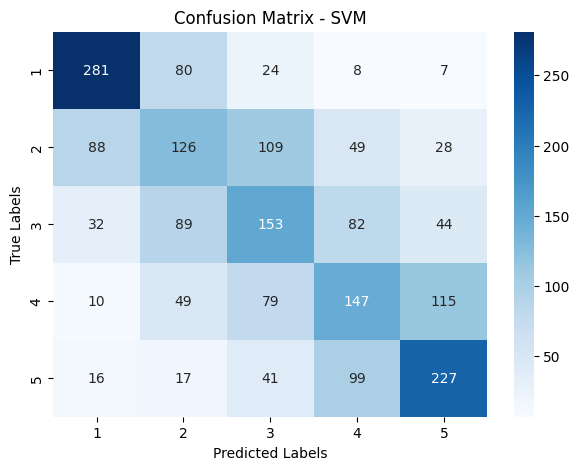

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# --- Evaluate on Test Set ---
y_pred_svm = best_svm.predict(X_test_bal_vec)
print("\nAccuracy:", accuracy_score(y_test_bal, y_pred_svm))
print("\nClassification Report:\n", classification_report(y_test_bal, y_pred_svm))

# --- Confusion Matrix ---
cm = confusion_matrix(y_test_bal, y_pred_svm)
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[1,2,3,4,5], yticklabels=[1,2,3,4,5])
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


In [ ]:
nb = MultinomialNB()
nb.fit(X_train_bal_vec, y_train_bal)
y_pred_nb = nb.predict(X_test_bal_vec)
print("Naive Bayes Report:\n", classification_report(y_test_bal, y_pred_nb))

In [ ]:
models = {
    "Logistic Regression": grid_lr,
    "Random Forest": best_rf,
    "SVM": best_svm,
    "Naive Bayes": nb
}

for name, model in models.items():
    preds = model.predict(X_test_bal_vec)
    print(f"\n{name} Accuracy: {accuracy_score(y_test_bal, preds):.4f}")


Logistic Regression Accuracy: 0.4830

Random Forest Accuracy: 0.4520

SVM Accuracy: 0.4670

Naive Bayes Accuracy: 0.4515


In [ ]:
import joblib
# Save Model_A (trained on balanced data)
joblib.dump(grid_lr, '/content/drive/MyDrive/ModelA_balanced.pkl')
print("✅ Model_A saved successfully (balanced).")

✅ Model_A saved successfully (balanced).


In [ ]:
vectorizer_bal = joblib.load('/content/drive/MyDrive/balanced_split/vectorizer_bal.pkl')